In [ ]:
!pip install -U ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 110.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
!nvidia-smi

Mon Jan  5 14:52:01 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   36C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9PX08KDhvi9PBvP61JA9")
project = rf.workspace("sahan-2iobg").project("coral-instance-segmentation-2-dkwb1")
version = project.version(4)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to coral-instance-segmentation-2-4 in yolov11:: 100%|██████████| 2314/2314 [00:00<00:00, 4882.87it/s]


In [ ]:
# Fast baseline training: YOLO11 small segmentation model
!yolo task=segment mode=train \
    model=yolo11s-seg.pt \
    data=/content/coral-instance-segmentation-2-4/data.yaml\
    epochs=60 \
    batch=8 \
    imgsz=640 \
    device=0 \
    name=coral_yolo11s_seg_fast \
    workers=4 \
    augment=True


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.247 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/coral-instance-segmentation-2-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/runs/segment/coral_yolo11s_seg_fast/weights/best.pt')

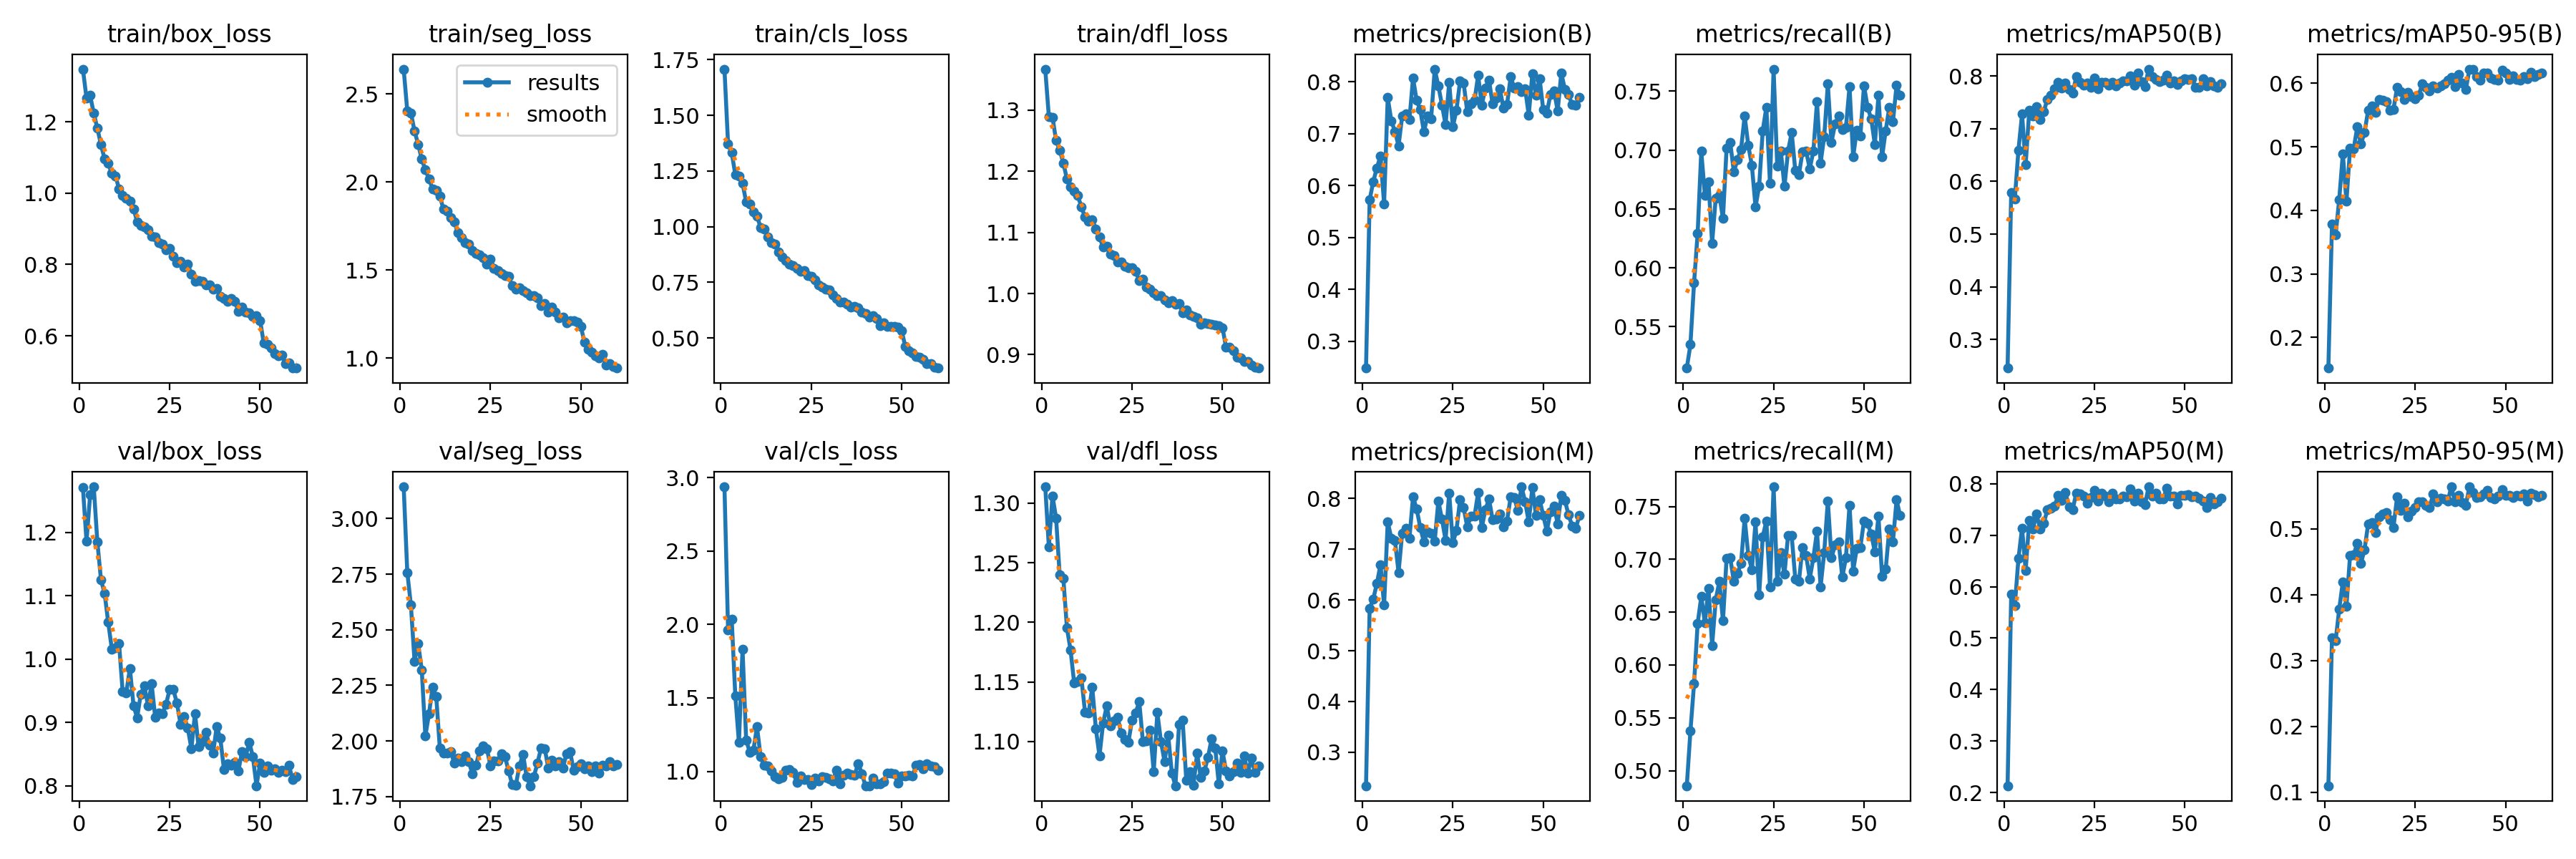

In [ ]:
# show training plots (if enabled)
from IPython.display import Image, display
display(Image("/content/runs/segment/coral_yolo11s_seg_fast/results.png"))

In [ ]:
results = model.predict(
    source="/content/coral-instance-segmentation-2-4/test/images/GOPR6698_JPG.rf.1f24486ab5c42f6070ec103c7153cb1c.jpg",
    save=True,
    conf=0.25,
    imgsz=640
)


image 1/1 /content/coral-instance-segmentation-2-4/test/images/GOPR6698_JPG.rf.1f24486ab5c42f6070ec103c7153cb1c.jpg: 640x640 2 corals, 11.1ms
Speed: 2.2ms preprocess, 11.1ms inference, 27.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/segment/predict


In [ ]:
import matplotlib.pyplot as plt
import cv2

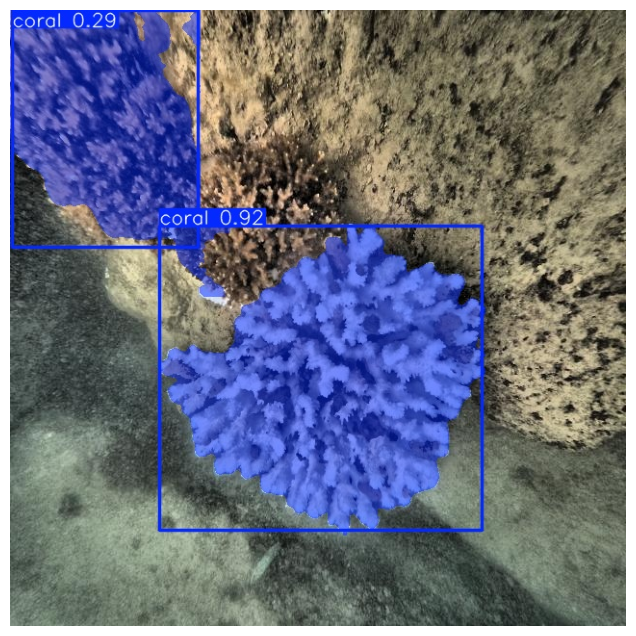

In [ ]:
img = cv2.imread('/content/runs/segment/predict/GOPR6698_JPG.rf.1f24486ab5c42f6070ec103c7153cb1c.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
metrics = model.val(
    data="/content/coral-instance-segmentation-2-4/data.yaml",
    imgsz=640,
    conf=0.25
)


Ultralytics 8.3.247 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2498.1±668.4 MB/s, size: 85.7 KB)
val: Scanning /content/coral-instance-segmentation-2-4/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 40/40 85.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.7it/s 1.7s
                   all         40        402      0.757      0.759      0.808       0.65      0.754      0.755      0.796        0.6
Speed: 3.9ms preprocess, 14.8ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to /content/runs/segment/val
